In [1]:
# importando o pandas
import pandas as pd

In [2]:
# usando a base de dados abaixo
dados = {
    'A' : [1, 1.5, 2, 1.5, -1, -0.5, 0, -0.5],
    'A2' : [-0.5, 0,-0.5, -1, 1.5, 2, 1.5, 1],
    'B' : [1, 1.5, 1, 0.5, -1,-0.5, -1, -1.5],
    'B2' : [-1.5, -1, -0.5, -1, 0.5, 1, 1.5, 1],
    'y': [1, 1, 1, 1, 0, 0, 0, 0,],
    'y2': [0, 0, 0, 0, 1, 1, 1, 1]
}

dados = pd.DataFrame(dados)

In [5]:
# e esses dados para fazer a previsão
dados_pred = {
    'A' : [2.5, 1.8, 0.5, -1, -1],
    'B': [2, 1, 0, 0, -1.5],
    'A2': [2.5, 1.8, 0.5, -1, -1],
    'B2': [2, 1, 0, 0, -1.5]
}

dados_pred = pd.DataFrame( dados_pred )

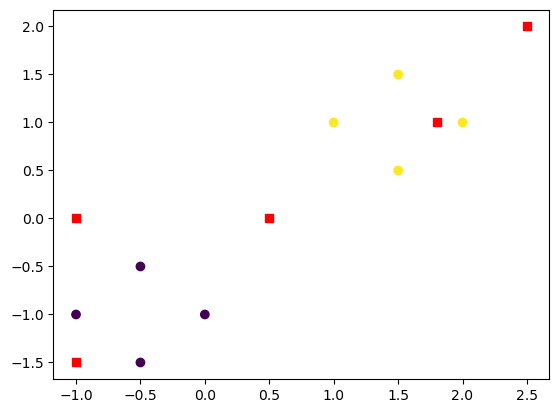

In [6]:
# podemos visualizar graficamente esses pontos
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(
    x=dados.A,
    y=dados.B,
    c=dados.y,
    cmap='viridis')
ax.scatter(
    x=dados_pred.A,
    y=dados_pred.B,
    c='r', marker='s')

plt.show()

In [16]:
# importando o KNN
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# criando o classificador
clf = KNeighborsClassifier(n_neighbors=3)

In [18]:
# selecionando os pontos de treino 
x = dados[['A2', 'B2']]
y= dados.y2

In [19]:
# e agora selecionando os dados de teste
x_test = dados_pred[['A2', 'B2']]

In [20]:
# podemos fazer o fit com os dados de treino
clf = clf.fit(x,y)

In [21]:
# e a previsão para os dados de teste
y_pred = clf.predict(x_test)

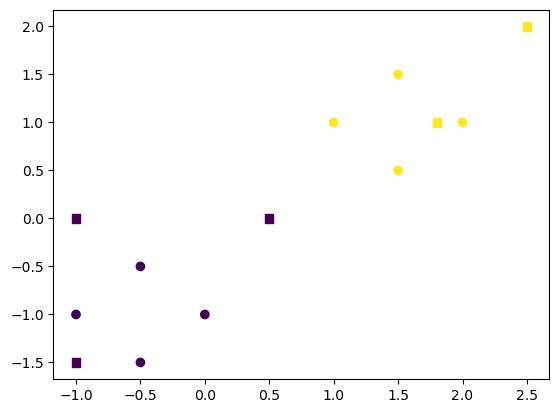

In [22]:
# podemos incluir nos dados de treino, a visualização dos dados de teste

fig, ax = plt.subplots()

ax.scatter(
    x=dados.A,
    y=dados.B,
    c=dados.y,
    cmap='viridis')
ax.scatter(
    x=dados_pred.A,
    y=dados_pred.B,
    c=y_pred, marker='s')

plt.show()

In [24]:
# podemos visualizar os dados que usamos anteriormente
dados[['A2', 'B2', 'y2']]

,A2,B2,y2
0,-0.5,-1.5,0
1,0.0,-1.0,0
2,-0.5,-0.5,0
3,-1.0,-1.0,0
4,1.5,0.5,1
5,2.0,1.0,1
6,1.5,1.5,1
7,1.0,1.0,1


In [25]:
# importando o dataset
from sklearn.datasets import load_iris 

In [26]:
# retornando os dados
iris = load_iris()

In [29]:
# transformando em um dataframe
iris_df = pd.DataFrame( iris.data, columns= iris.feature_names )
iris_df['target'] = iris.target

In [30]:
# visualizando a base
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [33]:
# selecionando apenas as colunas de pétala
iris1 = iris_df.loc[iris_df.target.isin([1,2]), ['petal length (cm)',	'petal width (cm)', 'target']]
iris1

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [34]:
# separando x e y
x = iris1[['petal length (cm)',	'petal width (cm)']]
y = iris1.target

In [36]:
# fazendo o train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

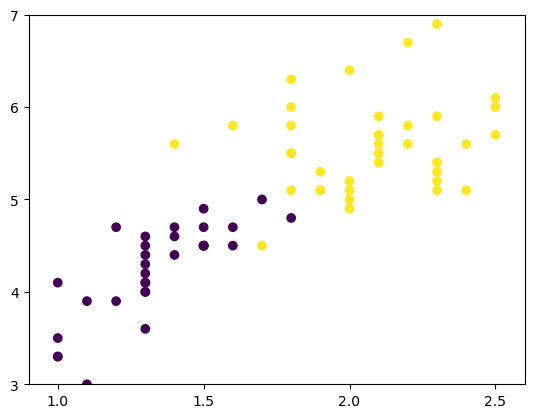

In [38]:
# visualizando os dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x=x_train['petal width (cm)'],
           y=x_train['petal length (cm)'],
           c=y_train,
           cmap='viridis')

ax.set(xlim=(0.9, 2.6), xticks=[1, 1.5, 2, 2.5],
       ylim=(3, 7), yticks=[3, 4, 5, 6, 7])

plt.show()

In [39]:
# criando o classificador
clf = KNeighborsClassifier(n_neighbors=3)

In [40]:
# fazendo o fit com os dados de treino
clf = clf.fit(x_train, y_train)

In [41]:
# fazendo a previsão para os dados de teste
y_pred = clf.predict(x_test)

In [42]:
# verificando a matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 6,  8]], dtype=int64)

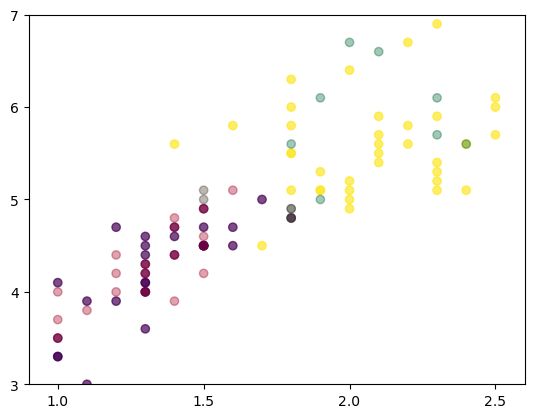

In [46]:
# podemos agora visualizar os dados de trieno e teste

fig, ax = plt.subplots()

ax.scatter(x=x_train['petal width (cm)'],
           y=x_train['petal length (cm)'],
           c=y_train, alpha=0.7,
           cmap='viridis')

ax.scatter(x=x_test['petal width (cm)'],
           y=x_test['petal length (cm)'],
           c=y_pred, alpha=0.2,
           cmap='RdYlGn')

ax.scatter(x=x_test['petal width (cm)'],
           y=x_test['petal length (cm)'],
           c=y_test, alpha=0.2,
           cmap='RdYlGn')

ax.set(xlim=(0.9, 2.6), xticks=[1, 1.5, 2, 2.5],
       ylim=(3, 7), yticks=[3, 4, 5, 6, 7])

plt.show()

In [47]:
x_test[y_test != y_pred]

,petal length (cm),petal width (cm)
133,5.1,1.5
123,4.9,1.8
126,4.8,1.8
127,4.9,1.8
138,4.8,1.8
119,5.0,1.5
